# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 2. Простой анализ данных.

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`** и html-версии графиков (подробности в условии).
* Телеграм не разрешает боту получать файлы более **20 Мб**. Если ваше решение весит больше, *заранее* разделите ноутбук на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания **используйте этот ноутбук в качестве основы, ничего не удаляя из него**. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 1.**

---

**Баллы за задание:**

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 2 &mdash; 80 баллов

---

In [49]:
# Bot check

# HW_ID: fpmi_ad2
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')


---
### <font color="orange"><i>Сложная часть</i></font>

### Задача 2

<a target="_blank" href="https://www.yelp.com/">Yelp</a> — веб-сайт для поиска на местном рынке услуг, например ресторанов или парикмахерских, с возможностью добавлять и просматривать рейтинги и обзоры этих услуг. Для популярных бизнесов имеются сотни обзоров. Для обозревателей на сайте предусмотрены элементы социальной сети.

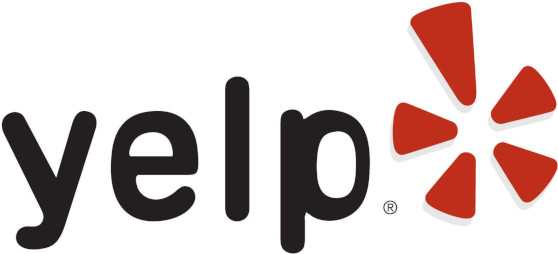

_____________

Вам предоставляется следующая информация о компаниях на Yelp:

Файл `yelp_business.csv`:
* `business_id` — уникальный идентификатор компании;
* `name` — имя компании;
* `address`, `city`, `state` — месторасположении компании;
* `latitude`, `longitude` — географические координаты;
* `categories` — категории услуг компании.

Файл `yelp_review.csv`, содержащий оценки пользователей:
* `business_id` — идентификатор компании, соответствующий файлу `yelp_business.csv`;
* `stars` — поставленная пользователем оценка от 1 до 5.

В целях сокращения объема файла, текстовые отзывы пользователей не были включены.

Оригинальную версию датасета в формате `json` можно посмотреть по <a target="_blank" href="https://www.kaggle.com/yelp-dataset/yelp-dataset/data">ссылке</a>, но использовать нужно выданные данные.

_____________

**Что нужно сделать:** 

* Найти город с наибольшим количеством компаний;
* Для этого города определить районы с наиболее качественными услугами. <a target="_blank" href="https://yandex.ru/company/researches/2017/msk_mobile_map">Пример</a> с несколько другой задачей.
* А также найти рестораны с наилучшими отзывами.


*Далее в условии встречаются различные подсказки, как можно выполнить определенные части задачи. Вы можете их игнорировать и делать иным способом для получения **того же самого промежуточного результата**. Однако, если ваше решение окажется **значительно** менее эффективным (по скорости, количеству и красоте кода) по сравнению с предполагаемым, баллы могут быть снижены.* 

------

#### 1. Город с наибольшим количеством компаний

Загрузите данные из файла `yelp_business.csv` с помощью функции `pd.read_csv`. Посмотрите на первые несколько строк с помощью метода `head`.

In [51]:
business_data = pd.read_csv("yelp_business.csv")
business_data.head()

,Unnamed: 0,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,is_open,categories
0,0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,1,Dentists;General Dentistry;Health & Medical;Or...
1,1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1,Departments of Motor Vehicles;Public Services ...
3,3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,0,Sporting Goods;Shopping
4,4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


Найдите пять городов, по которым присутствует информация о наибольшем количестве компаний. В таблице должен быть указан город (название) и количество компаний в этом городе.

*Подсказка.* Для выполнения стоит воспользоваться методами `groupby`, `count`, `sort_values`, `head`.

In [52]:
top_cities = business_data.groupby('city').size().sort_values(ascending=False).head(5).reset_index(name='count')
top_cities.columns = ['город', 'количество бизнеса']

print(top_cities)


        город  количество бизнеса
0   Las Vegas               26775
1     Phoenix               17213
2     Toronto               17206
3   Charlotte                8553
4  Scottsdale                8228


Пусть `N` &mdash; город с наибольшим количеством компаний. Оставьте в таблице только записи, соответствующие городу `N`. Нанесите все эти компании на график, в котором по оси $x$ отметьте долготу, а по оси $y$ &mdash; широту.

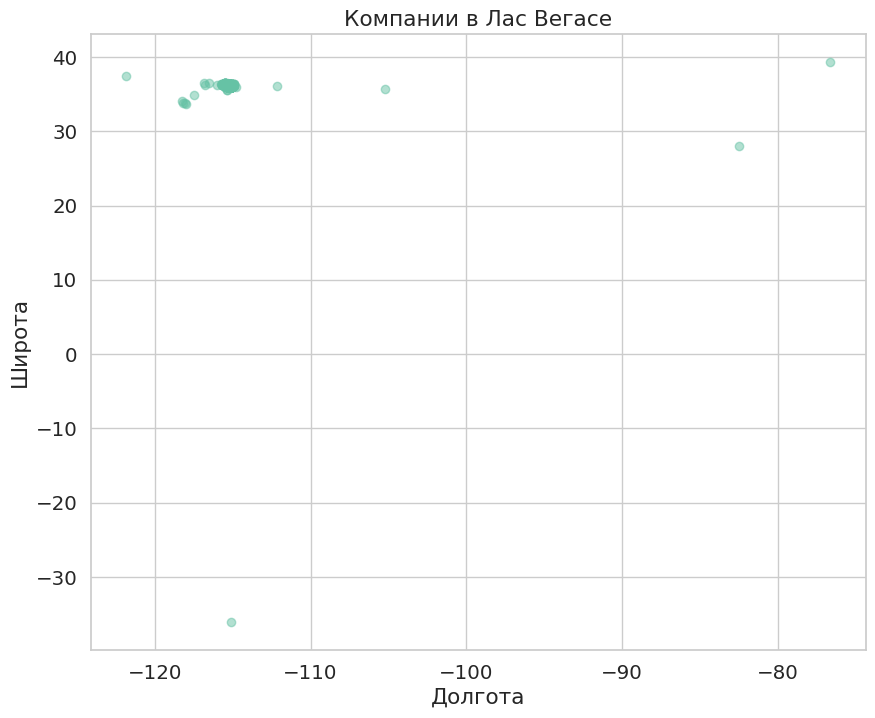

In [53]:
top_business_city_data = business_data[business_data['city'] == 'Las Vegas']

plt.figure(figsize=(10,8))
plt.scatter(top_business_city_data['longitude'], top_business_city_data['latitude'], alpha=0.5)
plt.title('Компании в Лас Вегасе')
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.show()

Сам город находится в сгустке точек. Есть какие-то компании, которые приписаны к этому городу, но находятся далеко от него. Избавьтесь от них, подобрав некоторые границы значений широты и долготы. Изобразите все компании на новом графике. На этом графике должны выделяться некоторые улицы. 

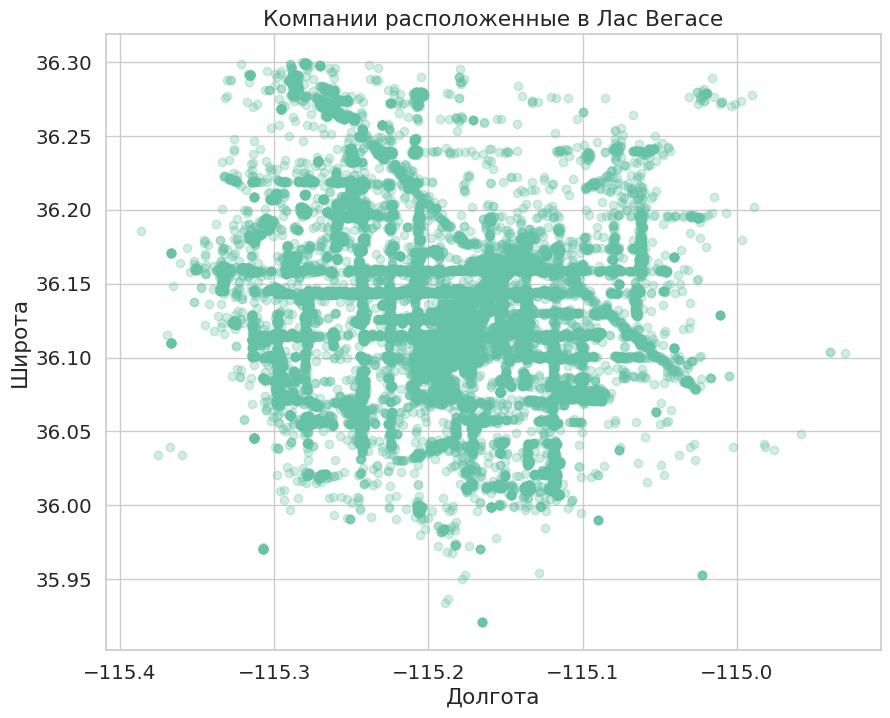

In [54]:
latitude_boundaries = (35.8, 36.3)
longitude_boundaries = (-115.4, -114.8)

filtered_las_vegas_data = top_business_city_data[
    (top_business_city_data['latitude'] >= latitude_boundaries[0]) & (top_business_city_data['latitude'] <= latitude_boundaries[1]) &
    (top_business_city_data['longitude'] >= longitude_boundaries[0]) & (top_business_city_data['longitude'] <= longitude_boundaries[1])
]  # Отбор компаний внутри заданных границ

plt.figure(figsize=(10, 8))  # Нанесение компаний на график
plt.scatter(filtered_las_vegas_data['longitude'], filtered_las_vegas_data['latitude'], alpha=0.3)
plt.title('Компании расположенные в Лас Вегасе')
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.show()


Разберитесь с тем, как подгрузить интерактивную карту города в качестве фона графика. Можно пойти двумя следующими способами.
1. Изучить <a href="https://miptstats.github.io/courses/python/11_plotly.html" target="_blank">материалы</a> по библиотеке <a href="https://plotly.com/python/" target="_blank"><b>Plotly</b></a>. Возможно, потребуется также заглянуть в документацию.
1. Поразбираться с библиотекой <a href="https://github.com/python-visualization/folium" target="_blank"><b>Folium</b></a>. Посмотрите множество <a href="https://nbviewer.org/github/python-visualization/folium/tree/main/examples/" target="_blank">примеров</a>, может также помочь <a href="https://proglib.io/p/python-web-map" target="_blank">статья на русском</a>.

*Внимание!* Интерактивная карта может не сохраниться в ноутбуке, а если сохранится, то вес ноутбука может превзойти 20 Мб, и его не получится отправить боту. В любом случае **<u>необходимо сохранить карту в html и отправить ее отдельным файлом в бот.</u>** При этом каждый файл html должен не превышать 20 Мб, присылать файлы в архиве нельзя. Аналогично со всеми следующими интерактивными графиками в этом задании.

In [55]:
import folium
from folium.plugins import HeatMap
# Средние координаты для центрирования карты
center_lat = filtered_las_vegas_data['latitude'].mean()
center_lon = filtered_las_vegas_data['longitude'].mean()

# Создание карты с Folium
las_vegas_map = folium.Map(location=[center_lat, center_lon], zoom_start=12, control_scale=True)

# Добавление точек на карту
for index, row in filtered_las_vegas_data.iterrows():
    folium.CircleMarker(location=[row['latitude'], row['longitude']], radius=5, color='#6666FF', fill=True, fill_color='#6666FF', fill_opacity = 0.7).add_to(las_vegas_map)
    
# Сохранение карты в HTML
las_vegas_map.save("las_vegas_map_with_filtered_points.html")

Если все получилось, вы молодцы! Далее в этой задаче тоже стройте интерактивные карты. Если нет желания разбираться с интерактивными графиками, можно построить статичные, но баллы будут снижены.

#### 2. Оценки компаний

Для выполнения задания нужно посчитать среднюю оценку каждой компании, а также количество выставленных оценок.

Загрузите таблицу оценок `yelp_review.csv`.

In [56]:
review_data = pd.read_csv('yelp_review.csv')
review_data = review_data.drop(columns=['Unnamed: 0'])
review_data.head()

,business_id,stars
0,AEx2SYEUJmTxVVB18LlCwA,5
1,VR6GpWIda3SfvPC-lg9H3w,5
2,CKC0-MOWMqoeWf6s-szl8g,5
3,ACFtxLv8pGrrxMm6EgjreA,4
4,s2I_Ni76bjJNK9yG60iD-Q,4


В подгруженной таблице оценок оставьте только компании города `N`. Для этого установите значения `business_id` в качестве индекса у таблицы оценок и воспользуйтесь методом `loc`. 

*Подсказка.* Чтобы индекс снова сделать полем таблицы, можно воспользоваться методом `reset_index`.

In [57]:
las_vegas_reviews = review_data.set_index('business_id').loc[filtered_las_vegas_data['business_id']]
las_vegas_reviews = las_vegas_reviews.reset_index()
las_vegas_reviews.head()

,business_id,stars
0,kCoE3jvEtg6UVz5SOD3GVw,4
1,kCoE3jvEtg6UVz5SOD3GVw,1
2,kCoE3jvEtg6UVz5SOD3GVw,5
3,kCoE3jvEtg6UVz5SOD3GVw,5
4,kCoE3jvEtg6UVz5SOD3GVw,5


Теперь посчитайте среднюю оценку каждой компании, а также количество выставленных компании оценок. 

*Подсказка.* Помочь в этом могут функции `groupby` и `aggregate([np.mean, np.size])`.

In [58]:
# Группировка по business_id и расчет средней оценки и количества оценок
average_ratings = las_vegas_reviews.groupby('business_id')['stars'].agg(['mean', 'size']).reset_index()
average_ratings.set_index('business_id', inplace = True)
average_ratings.head()  # Просмотр результата


,mean,size
business_id,,
--9e1ONYQuAa-CB_Rrw7Tw,4.088904,1451
--DdmeR16TRb3LsjG0ejrQ,3.200000,5
--WsruI0IGEoeRmkErU5Gg,4.928571,14
--Y7NhBKzLTbNliMUX_wfg,4.875000,8
--e8PjCNhEz32pprnPhCwQ,3.473684,19


Назовите колонки таблицы красивыми именами, изменив `<имя таблицы>.columns`, после чего напечатайте несколько строк полученной таблицы. Красивые имена &mdash; то, что будет понятно простому человеку при чтении ваших результатов. Как именно их назвать &mdash; задача аналитика, то есть в данном случае ваша :)

In [59]:
average_ratings.columns = ['average rating', 'number of reviews']

print(average_ratings.head())

                        average rating  number of reviews
business_id                                              
--9e1ONYQuAa-CB_Rrw7Tw        4.088904               1451
--DdmeR16TRb3LsjG0ejrQ        3.200000                  5
--WsruI0IGEoeRmkErU5Gg        4.928571                 14
--Y7NhBKzLTbNliMUX_wfg        4.875000                  8
--e8PjCNhEz32pprnPhCwQ        3.473684                 19


Соедините две полученные ранее таблицы по компаниям города `N` в одну.
Для этого сначала установите поле `business_id` в качестве индекса в обеих таблицах с помощью `set_index`. В одной из них это уже должно было быть сделано.
В полученной таблице должны получится поля `latitude`, `longitude`, `categories`, `name`, а также две колонки со средней оценкой компаний и количеством оценок, которые вы посчитали выше.

*Подсказка.* Соединение таблиц можно выполнить с помощью `join`.
Индексы у этих таблиц одинаковые, так что тип джойна не имеет значения.

In [60]:
filtered_las_vegas_data.set_index('business_id', inplace = True)

merged_data = filtered_las_vegas_data.join(average_ratings)  # Объединим две таблицы по индексу (business_id)

# Оставим только необходимые поля
merged_data = merged_data[['latitude', 'longitude', 'categories', 'name', 'average rating', 'number of reviews']]

merged_data.head()

,latitude,longitude,categories,name,average rating,number of reviews
business_id,,,,,,
kCoE3jvEtg6UVz5SOD3GVw,36.207430,-115.268460,Real Estate Services;Real Estate;Home Services...,"""BDJ Realty""",4.000000,5
OD2hnuuTJI9uotcKycxg1A,36.197484,-115.249660,Shopping;Sporting Goods,"""Soccer Zone""",1.444444,9
VBHEsoXQb2AQ76J9l8h1uQ,36.085051,-115.119421,Shopping;Jewelry;Watch Repair;Local Services,"""Alfredo's Jewelry""",4.739130,23
1Jp_hmPNUZArNqzpbm7B0g,36.056382,-115.269332,Home Services;Lighting Fixtures & Equipment;Lo...,"""Task Electric""",4.450000,20
DPQnTnNw2PJj7DdENM98Cw,36.105196,-115.056880,Nurseries & Gardening;Home & Garden;Shopping,"""Star Nursery""",3.680000,25


Изобразите все компании на графике, раскрасив точку в цвет, оттенок которого соответствует средней оценке компании. Прозрачность точки выставляйте не более $0.3$. Если у одной компании несколько филиалов с разными адресами, наносите на график все адреса.

In [61]:
def color_change(rating):  # функция для кластеризации по цветам
    if (rating < 2):
        return '#990000'
    elif (2<=rating < 3):
        return '#FF8000'
    elif(3<=rating<4):
        return '#DEFF00'
    else:
        return '#33FF33'

Здесь я решил на карту нанести только первые 20000 бизнесов, так как иначе его вес переваливает за 20 Мб.

In [62]:
from folium.plugins import MarkerCluster

ratings_map = folium.Map(location=[center_lat, center_lon], zoom_start=12, control_scale=True)

marker_cluster = MarkerCluster().add_to(ratings_map)  # Создаем кластер для точек

for _, row in merged_data.head(20000).iterrows():  # Добавляем точки компаний в кластер
    # Создаем точку на карте
    folium.CircleMarker(location=[row['latitude'], row['longitude']],
                  popup=f"{row['name']} - {row['average rating']:.2f}", fill_color = color_change(row['average rating']), fill_opacity = 0.3,
                  color = color_change(row['average rating'])).add_to(marker_cluster)


ratings_map.save("las_vegas_companies_map.html")  # Сохраняем карту в HTML-файл

Чтобы получить районы города, то есть разделить город на "клетки", округлите значения широты и долготы, подобрав оптимальный размер района. 

*Подсказка.* Например, можно сделать так
`np.round(долгота*4, decimals=1)*0.25`.

In [63]:
grid_size = 0.03  # Оптимальный размер района

merged_data['rounded_latitude'] = np.round(merged_data['latitude'] * 4, decimals=1) * 0.25  # Округление координат
merged_data['rounded_longitude'] = np.round(merged_data['longitude'] * 4, decimals=1) * 0.25

# Создание новой колонки для объединения координат в один уникальный идентификатор района
merged_data['area'] = merged_data['rounded_latitude'].astype(str) + '_' + merged_data['rounded_longitude'].astype(str)

Для получения средней оценки компаний по району постройте сводную таблицу при помощи `pd.pivot_table`, взяв в качестве индексов и колонок округленные широту и долготу, а в качестве значений &mdash; оценки. Аггрегирующей функцией является среднее.

Изобразите полученную таблицу при помощи `sns.heatmap`.

*Замечание.* В качестве среднего можно было бы посчитать как общее среднее по всем оценкам всех компаний, так и среднее по компаниям их средних оценок. В чем разница этих подходов? Какой из них необходимо использовать в данном случае?

1. **Общее среднее по всем оценкам всех компаний:**
   - Считается средний рейтинг, усредненный по всем оценкам в наборе данных.
   - Рассматривает каждую оценку как одинаково важную независимо от количества отзывов у компаний.
   - Приводит к тому, что компании с большим количеством отзывов имеют больший вес в общем среднем.

2. **Среднее по компаниям их средних оценок:**
   - Для каждой компании сначала вычисляется средний рейтинг, а затем берется среднее по этим средним оценкам всех компаний.
   - Учитывает разные размеры компаний, поскольку каждая компания вносит свой вклад в общее среднее, равный ее собственному среднему рейтингу.
   - Позволяет учесть, что у компаний с большим количеством отзывов может быть более стабильная оценка, так как усредняются многие оценки.

В данном случае, важно учитывать стабильность оценок и влияние каждой компании пропорционально её среднему рейтингу, поэтому более предпочтительным является второй подход - среднее по компаниям их средних оценок.

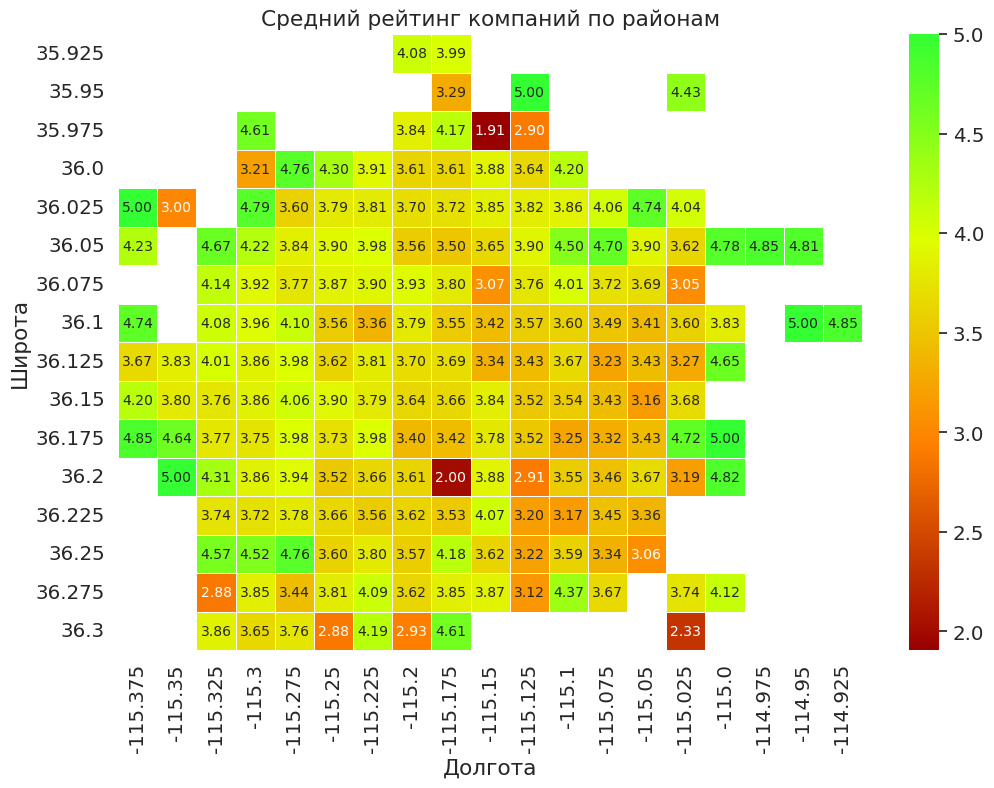

In [64]:

pivot_table1 = pd.pivot_table(merged_data, values='average rating', index='rounded_latitude', columns='rounded_longitude', aggfunc='mean')  # Создание сводной таблицы

cmap = sns.color_palette("blend:#990000,#FF8000,#DEFF00,#33FF33", as_cmap=True)  # цветовая палитра

plt.figure(figsize=(12, 8))  # Отображение тепловой карты
sns.heatmap(pivot_table1, cmap=cmap, annot=True, fmt=".2f", linewidths=.5, annot_kws={"size": 10})
plt.title('Средний рейтинг компаний по районам')
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.show()


Полученный график имеет ряд недостатков. Во-первых, не очень правильно судить о районе, если в нем мало компаний. Во-вторых,  на графике цветовая гамма автоматически подстроилась под минимальное и максимальное значения оценки.

Почему эти недостатки могут быть существенными?

**Ответ:** 
1. **Мало компаний в районе:** Если в каком-то районе всего несколько компаний, то средний рейтинг может быть сильно искажен из-за небольшого числа оценок. Это может привести к недостоверным результатам о качестве услуг в этом районе.

2. **Цветовая гамма:** Если автоматически подстроить цветовую гамму под минимальное и максимальное значение оценок, даже небольшие изменения могут выглядеть как существенные. Это может ввести в заблуждение, делая незначительные различия в оценках более значительными, чем они есть на самом деле.

Оба эти фактора могут исказить восприятие данных и привести к неверным выводам о качестве услуг или предпочтениях пользователей в разных районах.

Оставьте районы, в которых имеется информация о не менее $30$ компаний. Постройте новый график районов, использовав параметры `vmin` и `vmax` у функции `sns.heatmap`.

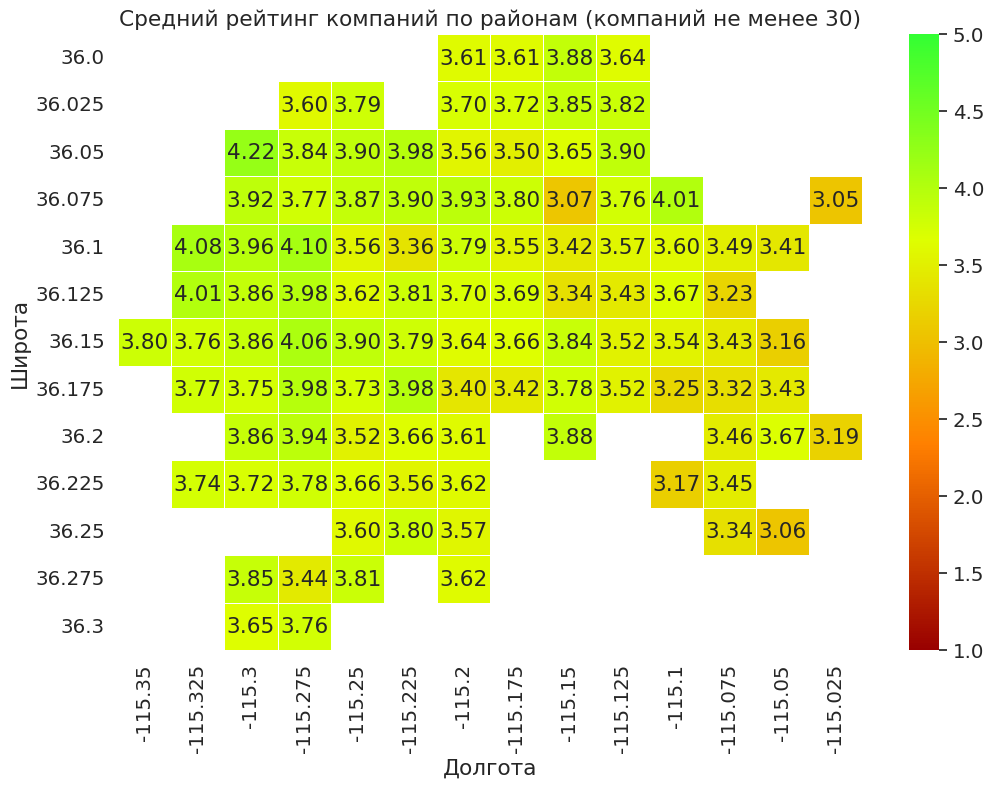

In [65]:
# Сгруппируем данные по районам и посчитаем количество компаний в каждом районе
area_counts = merged_data['area'].value_counts()

# Оставим только те районы, где компаний не менее 30
selected_areas = area_counts[area_counts >= 30].index
filtered_data = merged_data[merged_data['area'].isin(selected_areas)]

# Создание сводной таблицы
pivot_table2 = pd.pivot_table(filtered_data, values='average rating', index='rounded_latitude', columns='rounded_longitude', aggfunc='mean')

# Отображение тепловой карты с использованием vmin и vmax
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table2, cmap=cmap, annot=True, fmt=".2f", linewidths=.5, vmin=1, vmax=5)
plt.title('Средний рейтинг компаний по районам (компаний не менее 30)')
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.show()


Сравните полученный график с предыдущим и сделайте вывод.

**Вывод:** График с ограничением на количество компаний в районе (не менее 30) может быть более достоверным, так как учитывает более крупные и насыщенные информацией районы. График без такого ограничения мог быть подвержен искажениям из-за большого количества мелких районов с недостаточным количеством данных. Из второго графика явно видно, что в большинстве случаев бизнесы имеют рейтинг больше 3.

#### 3. Рестораны

Будем считать компанию рестораном, если в поле `categories` *содержится* слово `restaurant`. Обратите внимание, что в анализе данных часто нет четкого формата данных. Например, данное слово может быть написано как с большой буквы, так и с маленькой; может как разделяться `;`, так и не разделяться. При возникновении недопонимания стоит посмотреть данные.

Составьте таблицу, в которой будет информация о всех ресторанах города `N`, для которых имеется не менее $5$ отзывов. Далее постройте heatmap-график районов, в котором каждому району сопоставьте среднюю оценку по ресторанам этого района. Рассматривайте только те районы, в которых есть не менее $10$ ресторанов, для каждого из которых есть не менее $5$ отзывов.

In [66]:
rest_data = merged_data[merged_data['categories'].apply(lambda x: 'restaurant' in x.lower())]
rest_data.head()

,latitude,longitude,categories,name,average rating,number of reviews,rounded_latitude,rounded_longitude,area
business_id,,,,,,,,,
Pd52CjgyEU3Rb8co6QfTPw,36.066914,-115.170848,Nightlife;Bars;Barbeque;Sports Bars;American (...,"""Flight Deck Bar & Grill""",3.769231,13,36.075,-115.175,36.075_-115.175
4srfPk1s8nlm1YusyDUbjg,36.064652,-115.118954,Fast Food;Restaurants;Sandwiches,"""Subway""",2.666667,6,36.075,-115.125,36.075_-115.125
n7V4cD-KqqE3OXk0irJTyA,36.068259,-115.178877,Arcades;Arts & Entertainment;Gastropubs;Restau...,"""GameWorks""",3.117479,349,36.075,-115.175,36.075_-115.175
F0fEKpTk7gAmuSFI0KW1eQ,36.111057,-115.241688,Italian;Restaurants,"""Cafe Mastrioni""",1.666667,3,36.100,-115.250,36.1_-115.25
Wpt0sFHcPtV5MO9He7yMKQ,36.130013,-115.109310,Restaurants;Fast Food;Burgers,"""McDonald's""",2.150000,20,36.125,-115.100,36.125_-115.1


In [67]:
filtered_rest_data = rest_data[rest_data['number of reviews'] >= 5]  # оставили рестораны у которых хотя бы 5 отзывов
filtered_rest_data.head()

,latitude,longitude,categories,name,average rating,number of reviews,rounded_latitude,rounded_longitude,area
business_id,,,,,,,,,
Pd52CjgyEU3Rb8co6QfTPw,36.066914,-115.170848,Nightlife;Bars;Barbeque;Sports Bars;American (...,"""Flight Deck Bar & Grill""",3.769231,13,36.075,-115.175,36.075_-115.175
4srfPk1s8nlm1YusyDUbjg,36.064652,-115.118954,Fast Food;Restaurants;Sandwiches,"""Subway""",2.666667,6,36.075,-115.125,36.075_-115.125
n7V4cD-KqqE3OXk0irJTyA,36.068259,-115.178877,Arcades;Arts & Entertainment;Gastropubs;Restau...,"""GameWorks""",3.117479,349,36.075,-115.175,36.075_-115.175
Wpt0sFHcPtV5MO9He7yMKQ,36.130013,-115.109310,Restaurants;Fast Food;Burgers,"""McDonald's""",2.150000,20,36.125,-115.100,36.125_-115.1
W1Yr6c2XDx_RBjb6WsV-aQ,36.170706,-115.190288,Restaurants;Cafes;American (New);Bars;Nightlif...,"""Divine Cafe at the Springs Preserve""",4.050000,140,36.175,-115.200,36.175_-115.2


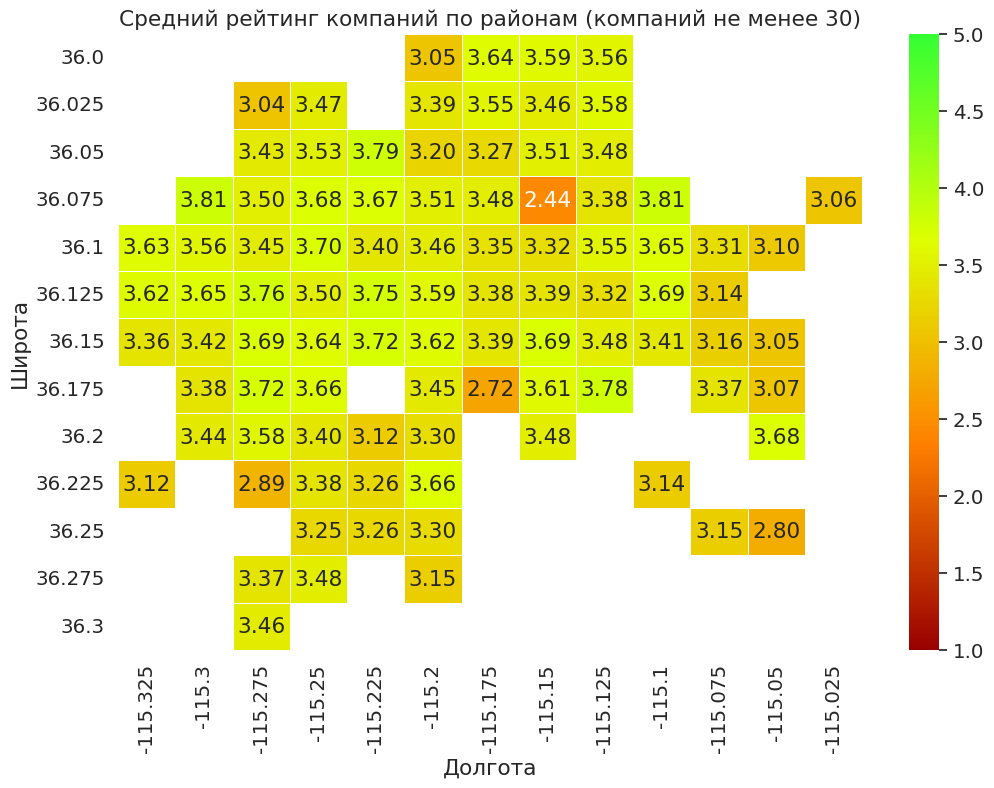

In [68]:
rest_area_counts = filtered_rest_data['area'].value_counts()

selected_rest_areas = rest_area_counts[rest_area_counts >= 10].index  # Оставим только те районы, где ресторанов не менее 10
filtered_rest_area_data = filtered_rest_data[filtered_rest_data['area'].isin(selected_rest_areas)]

# Создание сводной таблицы
pivot_table3 = pd.pivot_table(filtered_rest_area_data, values='average rating', index='rounded_latitude', columns='rounded_longitude', aggfunc='mean')

plt.figure(figsize=(12, 8))  # Отображение тепловой карты
sns.heatmap(pivot_table3, cmap=cmap, annot=True, fmt=".2f", linewidths=.5, vmin=1, vmax=5)
plt.title('Средний рейтинг компаний по районам (компаний не менее 30)')
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.show()

Чем полезны ограничения снизу на количество отзывов для ресторана и количество ресторанов в районе?

**Ответ:** 

1. **Достоверность:** Больше отзывов и больше ресторанов в районе делают данные более надежными и точными.

2. **Исключение случайных влияний:** Маленькие выборки могут быть подвержены влиянию случайных факторов, ограничения позволяют избежать этого.

3. **Доверие к оценкам:** Больше отзывов и ресторанов увеличивают доверие к средней оценке района.

4. **Более полное представление:** Больше ресторанов в районе дают более полное представление о кулинарном разнообразии района.

Однако важно установить разумные значения для этих ограничений, чтобы избежать исключения слишком многих данных.

Кот Василий из города `N` очень придирчив к выбору ресторана. Он доверяет только ресторанам с высоким рейтингом, который основывается на большом количестве отзывов. Напечатайте в виде таблицы информацию $10$ ресторанах с самым большим рейтингом в порядке убывания рейтинга. Для каждого из этих ресторанов должно быть не менее $50$ отзывов. По каждому ресторану необходимо вывести следующую информации: название ресторана, средняя оценка, количество отзывов, географические координаты, категории.

In [69]:
fifty_review_restaurants = rest_data[rest_data['number of reviews'] >= 50]  # Сортируем по количеству отзывов и рейтингу
top_restaurants = fifty_review_restaurants.sort_values(by='average rating', ascending=False).head(10)

top_restaurants = top_restaurants[['name', 'average rating', 'number of reviews', 'latitude', 'longitude', 'categories']]  # оставляем только интересующую нас информацию
top_restaurants.reset_index(drop=True, inplace=True)
top_restaurants.index += 1

top_restaurants  # Вывод информации о топ-10 ресторанах


,name,average rating,number of reviews,latitude,longitude,categories
1,"""Lip Smacking Foodie Tours""",4.966480,179,36.114537,-115.172678,Food Tours;Restaurants;Event Planning & Servic...
2,"""Pepito Shack""",4.907692,65,36.152477,-115.151945,Restaurants;Burgers;Food Stands;Sandwiches;Hot...
3,"""Bosa Boba Cafe""",4.890909,55,36.125960,-115.184846,Vietnamese;Bubble Tea;Sandwiches;Food;Coffee &...
4,"""Garden Grill""",4.868132,91,36.166783,-115.286197,Tacos;Street Vendors;Farmers Market;Vegetarian...
5,"""Brew Tea Bar""",4.848069,1165,36.054195,-115.242443,Cafes;Tea Rooms;Food;Bubble Tea;Restaurants;De...
6,"""Poppa Naps BBQ""",4.836538,104,36.116549,-115.088115,Food Stands;Hot Dogs;Caterers;Restaurants;Amer...
7,"""Zenaida's Cafe""",4.833333,180,36.101741,-115.100359,Restaurants;Breakfast & Brunch;Cafes
8,"""El Frescos Cocina Mexicana""",4.816754,191,36.098527,-115.148446,Caterers;Mexican;Restaurants;Food;Event Planni...
9,"""Blaqcat Ultra Hookah Lounge""",4.809524,63,36.159742,-115.232738,Adult Entertainment;Lounges;Hookah Bars;Restau...
10,"""California Sushi Burrito""",4.807018,57,36.125636,-115.202487,Asian Fusion;Fast Food;Restaurants;Japanese;Po...


Нанесите на карту все рестораны со средней оценкой не менее $4.7$, которая посчитана по не менее $50$ отзывам. Отдельным цветом отметьте 10 ресторанов, которые вы получили ранее.

In [70]:
restaurants_map = folium.Map(location=[center_lat, center_lon], zoom_start=12, control_scale=True)  # Создаем карту
high_rating_restaurants = fifty_review_restaurants[fifty_review_restaurants['average rating'] >= 4.7]  # отбираем с высоким рейтингом
not_top_rest = high_rating_restaurants.sort_values(by='average rating', ascending=False)[10:]  # оставляем все кроме топ 10

for _, row in not_top_rest.iterrows():  # Добавляем рестораны с высоким рейтингом (больше 4.7)
    # Создаем точку на карте
    folium.CircleMarker(location=[row['latitude'], row['longitude']],
                        popup=f"{row['name']} - {row['average rating']:.2f}",
                        radius=10, 
                        fill_color='green',  # Зеленый цвет для ресторанов с высоким рейтингом
                        fill_opacity=0.8,
                        color = 'green',
                        icon=folium.Icon(color='red')).add_to(restaurants_map)

for _, row in top_restaurants.iterrows():  # Добавляем топ-10 ресторанов
    folium.Marker(location=[row['latitude'], row['longitude']],
                  popup=f"{row['name']} - {row['average rating']:.2f}",
                  icon=folium.Icon(color='red', prefix='fa', icon='star')).add_to(restaurants_map)

# Сохраняем карту в HTML-файл
restaurants_map.save("top_restaurants_map.html")



Охарактеризуйте кота Василия, а также сделайте общий вывод по задаче.

**Вывод:** Кот Василий, основываясь на предоставленных запросах и предпочтениях, проявляет изысканный вкус в выборе ресторанов, предпочитая те, которые имеют высокий рейтинг, основанный на большом количестве отзывов. Он бережливо относится к своим оценкам и полагается на мнение широкой аудитории, прежде чем сделать выбор.

По результатам анализа данных Лас Вегаса, была выполнена исчерпывающая оценка ресторанных предпочтений и районов города. При этом учитывались различные аспекты, такие как общая оценка, количество отзывов, географическое распределение ресторанов.

На карте были выделены рестораны с высоким рейтингом, а также выделены топ-10 ресторанов красными иконками для лучшей визуализации.

Лас Вегаспредлагает разнообразные ресторанные возможности, и кот Василий, ориентируясь на качество и популярность, может наслаждаться изысканным выбором заведений в различных районах города.